In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Tweet Counts
import requests
import json

# Import API key
from api_keys import twitter_key

# Set API Token
bearer_token = twitter_key

# Set Search URL
search_url = "https://api.twitter.com/2/tweets/counts/recent"

# Twitter API format OAuth request
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentTweetCountsPython"
    return r

# Twitter API connect to server
def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


In [35]:
def main():
    
    # Overview
        # Read leagues and corresponding team names from excel spreadsheet
        # Make API Requests
        # Clean data
        # Store league data in separate Data Frames
        # Compare leagues
    
    # Organize league data
    
    # Premier League Data
    # Read team names and twitter accounts from excel
    premier_league_data = pd.read_excel(open('Sports.xlsx', 'rb'),
              sheet_name="Premier League")
    # Set global variable
    global premier_league 
    # Create DataFrame
    premier_league = pd.DataFrame(premier_league_data, columns=["Team Name", "Account", "Start Date", "End Date", "Day 0 Tweets", "Day 1 Tweets", "Day 2 Tweets", "Day 3 Tweets", "Day 4 Tweets", "Day 5 Tweets", "Day 6 Tweets", "Day 7 Tweets", "Total Tweets"])
    
    # NFL
    nfl_data = pd.read_excel(open('Sports.xlsx', 'rb'),
              sheet_name='NFL')
    global nfl
    nfl = pd.DataFrame(nfl_data, columns=["Team Name", "Account", "Start Date", "End Date", "Day 0 Tweets", "Day 1 Tweets", "Day 2 Tweets", "Day 3 Tweets", "Day 4 Tweets", "Day 5 Tweets", "Day 6 Tweets", "Day 7 Tweets", "Total Tweets"])

    # MLB
    mlb_data = pd.read_excel(open('Sports.xlsx', 'rb'),
              sheet_name='MLB') 
    global mlb
    mlb = pd.DataFrame(mlb_data, columns=["Team Name", "Account", "Start Date", "End Date", "Day 0 Tweets", "Day 1 Tweets", "Day 2 Tweets", "Day 3 Tweets", "Day 4 Tweets", "Day 5 Tweets", "Day 6 Tweets", "Day 7 Tweets", "Total Tweets"])

    # NBA
    nba_data = pd.read_excel(open('Sports.xlsx', 'rb'),
              sheet_name='NBA')
    global nba
    nba = pd.DataFrame(nba_data, columns=["Team Name", "Account", "Start Date", "End Date", "Day 0 Tweets", "Day 1 Tweets", "Day 2 Tweets", "Day 3 Tweets", "Day 4 Tweets", "Day 5 Tweets", "Day 6 Tweets", "Day 7 Tweets", "Total Tweets"])

    # Loop through the Premier League
    for team in premier_league["Team Name"]:

        # Make API Request
        
        # Select current team's twitter account name from league dataframe
        account = premier_league.loc[premier_league["Team Name"] == team, "Account"].item()
        account = account.replace(u'\xa0', u' ')
        
        # Format parameters for request
        query_params = {'query': account, 'granularity': 'day'}
        
        # Make API Call
        json_response = connect_to_endpoint(search_url, query_params)
        
        # Add data to the league data frame
        
        # Data includes start date, end data, tweet count for each day, overall tweet count
        premier_league.loc[premier_league["Team Name"] == team, "Start Date"] = json_response["data"][0]["start"]
        premier_league.loc[premier_league["Team Name"] == team, "End Date"] = json_response["data"][7]["end"]
        premier_league.loc[premier_league["Team Name"] == team, "Day 0 Tweets"] = json_response["data"][0]["tweet_count"]
        premier_league.loc[premier_league["Team Name"] == team, "Day 1 Tweets"] = json_response["data"][1]["tweet_count"]
        premier_league.loc[premier_league["Team Name"] == team, "Day 2 Tweets"] = json_response["data"][2]["tweet_count"]
        premier_league.loc[premier_league["Team Name"] == team, "Day 3 Tweets"] = json_response["data"][3]["tweet_count"]
        premier_league.loc[premier_league["Team Name"] == team, "Day 4 Tweets"] = json_response["data"][4]["tweet_count"]
        premier_league.loc[premier_league["Team Name"] == team, "Day 5 Tweets"] = json_response["data"][5]["tweet_count"]
        premier_league.loc[premier_league["Team Name"] == team, "Day 6 Tweets"] = json_response["data"][6]["tweet_count"]
        premier_league.loc[premier_league["Team Name"] == team, "Day 7 Tweets"] = json_response["data"][7]["tweet_count"]
        premier_league.loc[premier_league["Team Name"] == team, "Total Tweets"] = premier_league.loc[premier_league["Team Name"] == team, "Day 0 Tweets"] + premier_league.loc[premier_league["Team Name"] == team, "Day 1 Tweets"] + premier_league.loc[premier_league["Team Name"] == team, "Day 2 Tweets"] + premier_league.loc[premier_league["Team Name"] == team, "Day 3 Tweets"] + premier_league.loc[premier_league["Team Name"] == team, "Day 4 Tweets"] + premier_league.loc[premier_league["Team Name"] == team, "Day 5 Tweets"] + premier_league.loc[premier_league["Team Name"] == team, "Day 6 Tweets"] + premier_league.loc[premier_league["Team Name"] == team, "Day 7 Tweets"]

    # Loop through the NFL
    for team in nfl["Team Name"]:
        
        # Make API Request
        account = nfl.loc[nfl["Team Name"] == team, "Account"].item()
        account = account.replace(u'\xa0', u' ')
        query_params = {'query': account, 'granularity': 'day'}        
        json_response = connect_to_endpoint(search_url, query_params)

        # Add data to the league data frame
        
        # Data includes start date, end data, tweet count for each day, overall tweet count  
        nfl.loc[nfl["Team Name"] == team, "Start Date"] = json_response["data"][0]["start"]
        nfl.loc[nfl["Team Name"] == team, "End Date"] = json_response["data"][7]["end"]
        nfl.loc[nfl["Team Name"] == team, "Day 0 Tweets"] = json_response["data"][0]["tweet_count"]
        nfl.loc[nfl["Team Name"] == team, "Day 1 Tweets"] = json_response["data"][1]["tweet_count"]
        nfl.loc[nfl["Team Name"] == team, "Day 2 Tweets"] = json_response["data"][2]["tweet_count"]
        nfl.loc[nfl["Team Name"] == team, "Day 3 Tweets"] = json_response["data"][3]["tweet_count"]
        nfl.loc[nfl["Team Name"] == team, "Day 4 Tweets"] = json_response["data"][4]["tweet_count"]
        nfl.loc[nfl["Team Name"] == team, "Day 5 Tweets"] = json_response["data"][5]["tweet_count"]
        nfl.loc[nfl["Team Name"] == team, "Day 6 Tweets"] = json_response["data"][6]["tweet_count"]
        nfl.loc[nfl["Team Name"] == team, "Day 7 Tweets"] = json_response["data"][7]["tweet_count"]
        nfl.loc[nfl["Team Name"] == team, "Total Tweets"] = nfl.loc[nfl["Team Name"] == team, "Day 0 Tweets"] + nfl.loc[nfl["Team Name"] == team, "Day 1 Tweets"] + nfl.loc[nfl["Team Name"] == team, "Day 2 Tweets"] + nfl.loc[nfl["Team Name"] == team, "Day 3 Tweets"] + nfl.loc[nfl["Team Name"] == team, "Day 4 Tweets"] + nfl.loc[nfl["Team Name"] == team, "Day 5 Tweets"] + nfl.loc[nfl["Team Name"] == team, "Day 6 Tweets"] + nfl.loc[nfl["Team Name"] == team, "Day 7 Tweets"]

    # Loop through the MLB
    for team in mlb["Team Name"]:

        # Make API Request
        account = mlb.loc[mlb["Team Name"] == team, "Account"].item()
        account = account.replace(u'\xa0', u' ')
        query_params = {'query': account, 'granularity': 'day'}            
        json_response = connect_to_endpoint(search_url, query_params)

        # Add data to the league data frame
        
        # Data includes start date, end data, tweet count for each day, overall tweet count
        mlb.loc[mlb["Team Name"] == team, "Start Date"] = json_response["data"][0]["start"]
        mlb.loc[mlb["Team Name"] == team, "End Date"] = json_response["data"][7]["end"]
        mlb.loc[mlb["Team Name"] == team, "Day 0 Tweets"] = json_response["data"][0]["tweet_count"]
        mlb.loc[mlb["Team Name"] == team, "Day 1 Tweets"] = json_response["data"][1]["tweet_count"]
        mlb.loc[mlb["Team Name"] == team, "Day 2 Tweets"] = json_response["data"][2]["tweet_count"]
        mlb.loc[mlb["Team Name"] == team, "Day 3 Tweets"] = json_response["data"][3]["tweet_count"]
        mlb.loc[mlb["Team Name"] == team, "Day 4 Tweets"] = json_response["data"][4]["tweet_count"]
        mlb.loc[mlb["Team Name"] == team, "Day 5 Tweets"] = json_response["data"][5]["tweet_count"]
        mlb.loc[mlb["Team Name"] == team, "Day 6 Tweets"] = json_response["data"][6]["tweet_count"]
        mlb.loc[mlb["Team Name"] == team, "Day 7 Tweets"] = json_response["data"][7]["tweet_count"]
        mlb.loc[mlb["Team Name"] == team, "Total Tweets"] = mlb.loc[mlb["Team Name"] == team, "Day 0 Tweets"] + mlb.loc[mlb["Team Name"] == team, "Day 1 Tweets"] + mlb.loc[mlb["Team Name"] == team, "Day 2 Tweets"] + mlb.loc[mlb["Team Name"] == team, "Day 3 Tweets"] + mlb.loc[mlb["Team Name"] == team, "Day 4 Tweets"] + mlb.loc[mlb["Team Name"] == team, "Day 5 Tweets"] + mlb.loc[mlb["Team Name"] == team, "Day 6 Tweets"] + mlb.loc[mlb["Team Name"] == team, "Day 7 Tweets"]

    # Loop through the NBA
    for team in nba["Team Name"]:

        # Make API Request
        account = nba.loc[nba["Team Name"] == team, "Account"].item()
        account = account.replace(u'\xa0', u' ')
        query_params = {'query': account, 'granularity': 'day'}    
        json_response = connect_to_endpoint(search_url, query_params)

        # Add data to the league data frame
        
        # Data includes start date, end data, tweet count for each day, overall tweet count
        nba.loc[nba["Team Name"] == team, "Start Date"] = json_response["data"][0]["start"]
        nba.loc[nba["Team Name"] == team, "End Date"] = json_response["data"][7]["end"]
        nba.loc[nba["Team Name"] == team, "Day 0 Tweets"] = json_response["data"][0]["tweet_count"]
        nba.loc[nba["Team Name"] == team, "Day 1 Tweets"] = json_response["data"][1]["tweet_count"]
        nba.loc[nba["Team Name"] == team, "Day 2 Tweets"] = json_response["data"][2]["tweet_count"]
        nba.loc[nba["Team Name"] == team, "Day 3 Tweets"] = json_response["data"][3]["tweet_count"]
        nba.loc[nba["Team Name"] == team, "Day 4 Tweets"] = json_response["data"][4]["tweet_count"]
        nba.loc[nba["Team Name"] == team, "Day 5 Tweets"] = json_response["data"][5]["tweet_count"]
        nba.loc[nba["Team Name"] == team, "Day 6 Tweets"] = json_response["data"][6]["tweet_count"]
        nba.loc[nba["Team Name"] == team, "Day 7 Tweets"] = json_response["data"][7]["tweet_count"]
        nba.loc[nba["Team Name"] == team, "Total Tweets"] = nba.loc[nba["Team Name"] == team, "Day 0 Tweets"] + nba.loc[nba["Team Name"] == team, "Day 1 Tweets"] + nba.loc[nba["Team Name"] == team, "Day 2 Tweets"] + nba.loc[nba["Team Name"] == team, "Day 3 Tweets"] +nba.loc[nba["Team Name"] == team, "Day 4 Tweets"] + nba.loc[nba["Team Name"] == team, "Day 5 Tweets"] +nba.loc[nba["Team Name"] == team, "Day 6 Tweets"] + nba.loc[nba["Team Name"] == team, "Day 7 Tweets"]
      
if __name__ == "__main__":
    main()

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [52]:
# Display the data
# display(premier_league)

In [51]:
# display(nfl)

In [50]:
# display(mlb)

In [49]:
# display(nba)

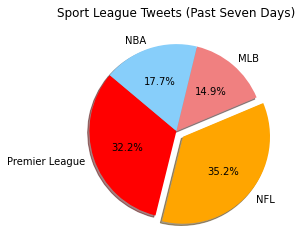

In [53]:
# Create pie chart to show how values are relative to eachother

# Obtain total tweets for each league
premier_league_total = premier_league["Total Tweets"].sum()
nfl_total = nfl["Total Tweets"].sum()
mlb_total = mlb["Total Tweets"].sum()
nba_total = nba["Total Tweets"].sum()

# Labels for the sections of our pie chart
labels = ["Premier League", "NFL", "MLB", "NBA"]

# The values of each section of the pie chart
sizes = [premier_league_total, nfl_total, mlb_total, nba_total]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sport League Tweets (Past Seven Days)")
plt.show()

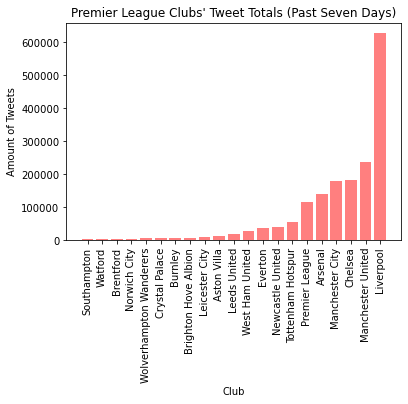

The average amount of tweets per team in the Premier League is 82586.04761904762


In [11]:
# Save data to excel

# Create graphs
    # Seven day graphs for each league comparing teams
    # Totals in bar chart comparing teams in leagues
    # Totals in bar chart comparing totals for each leagues  
    
# Premier League team comparison
premier_league = premier_league.sort_values(by=["Total Tweets"])
x_axis= np.arange(len(premier_league))
tick_locations = [value+0.4 for value in x_axis]
ax = plt.bar(x_axis, premier_league["Total Tweets"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, premier_league["Team Name"], rotation="vertical")
plt.title("Premier League Clubs' Tweet Totals (Past Seven Days)")
plt.xlabel("Club")
plt.ylabel("Amount of Tweets")
plt.show()
print("The average amount of tweets per team in the Premier League is " + str(premier_league["Total Tweets"].mean()))


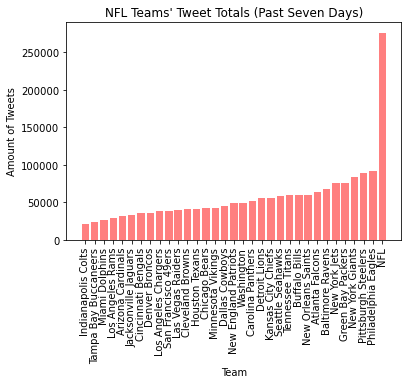

The average amount of tweets per team in the NFL is 57386.84848484849


In [12]:
# NFL League team comparison
nfl = nfl.sort_values(by=["Total Tweets"])
x_axis= np.arange(len(nfl))
tick_locations = [value+0.4 for value in x_axis]
ax2 = plt.bar(x_axis, nfl["Total Tweets"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, nfl["Team Name"], rotation="vertical")
plt.title("NFL Teams' Tweet Totals (Past Seven Days)")
plt.xlabel("Team")
plt.ylabel("Amount of Tweets")
plt.show()
print("The average amount of tweets per team in the NFL is " + str(nfl["Total Tweets"].mean()))

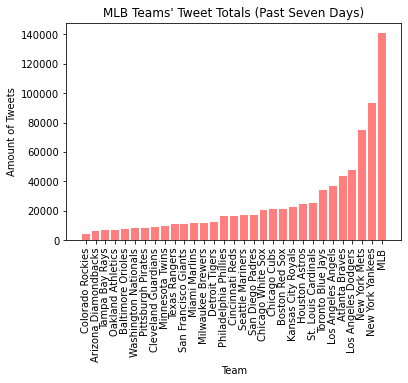

The average amount of tweets per team in the MLB is 25800.225806451614


In [13]:
# MLB League team comparison
mlb = mlb.sort_values(by=["Total Tweets"])
x_axis= np.arange(len(mlb))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, mlb["Total Tweets"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, mlb["Team Name"], rotation="vertical")
plt.title("MLB Teams' Tweet Totals (Past Seven Days)")
plt.xlabel("Team")
plt.ylabel("Amount of Tweets")
plt.show()
print("The average amount of tweets per team in the MLB is " + str(mlb["Total Tweets"].mean()))

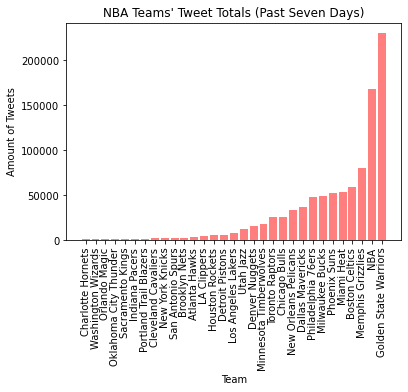

The average amount of tweets per team in the NBA is 30734.41935483871


In [14]:
# NBA League team comparison
nba = nba.sort_values(by=["Total Tweets"])
x_axis= np.arange(len(nba))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, nba["Total Tweets"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, nba["Team Name"], rotation="vertical")
plt.title("NBA Teams' Tweet Totals (Past Seven Days)")
plt.xlabel("Team")
plt.ylabel("Amount of Tweets")
plt.show()
print("The average amount of tweets per team in the NBA is " + str(nba["Total Tweets"].mean()))

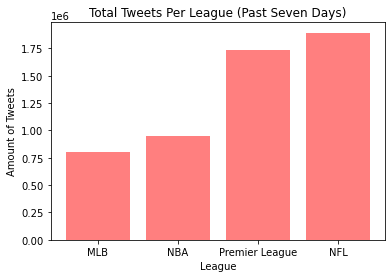

In [16]:
# Average tweets league comparison
total_tweet_data = { "Total Tweets" : [
                      premier_league["Total Tweets"].sum(), 
                      nfl["Total Tweets"].sum(), 
                      mlb["Total Tweets"].sum(), 
                      nba["Total Tweets"].sum()
                     ],
                    "League" : ["Premier League", "NFL", "MLB", "NBA"] }

total_tweets = pd.DataFrame(total_tweet_data)
total_tweets = total_tweets.sort_values(by=["Total Tweets"])
x_axis= np.arange(len(total_tweets))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, total_tweets["Total Tweets"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, total_tweets["League"])
plt.title("Total Tweets Per League (Past Seven Days)")
plt.xlabel("League")
plt.ylabel("Amount of Tweets")
plt.show()

F_onewayResult(statistic=3.3858221969815654, pvalue=0.020664745623296066)

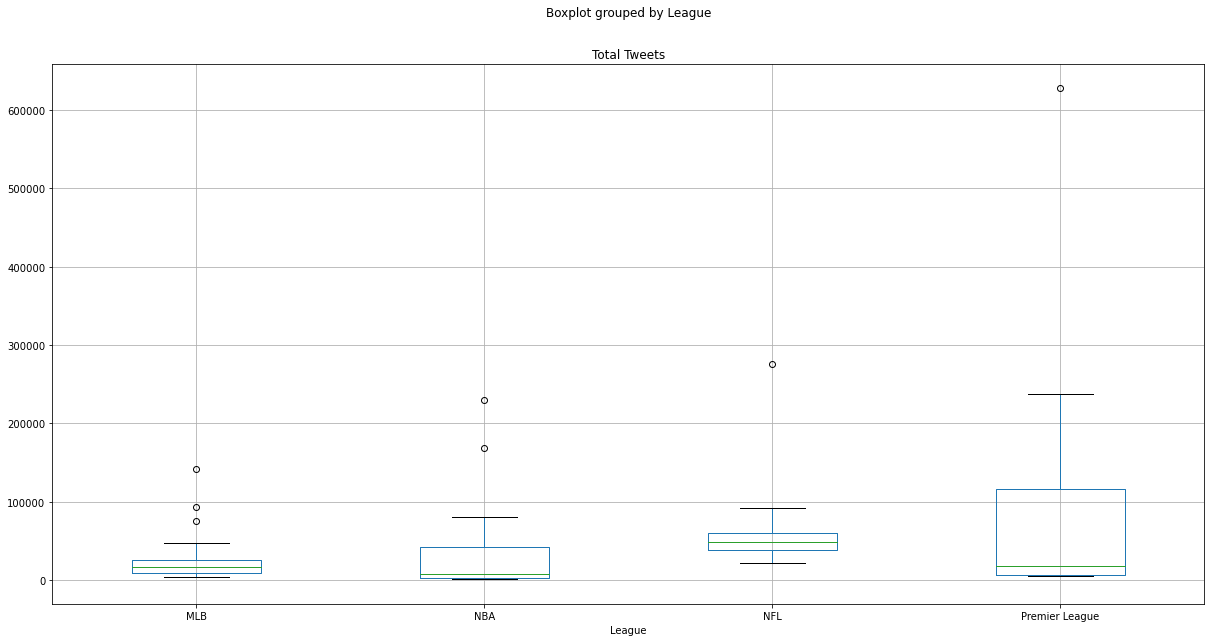

In [48]:
# Create a boxplot to compare means

# Format data
# Set league name for each table
premier_league["League"] = "Premier League"
nfl["League"] = "NFL"
nba["League"] = "NBA"
mlb["League"] = "MLB"
# Combine league data into one Data Frame
overview = pd.concat([premier_league, nfl, nba, mlb], axis=0)
# Display box plot
overview.boxplot("Total Tweets", by="League", figsize=(20, 10))

# Perform the ANOVA
# Obtain the total tweet counts for each team in each league
premier_league_total_tweets = premier_league["Total Tweets"]
nfl_total_tweets = nfl["Total Tweets"]
mlb_total_tweets = mlb["Total Tweets"]
nba_total_tweets = nba["Total Tweets"]

# TTest Comparison of Premier league and the NFL shows no significant difference (pvalue=0.44)
stats.ttest_ind(premier_league_total_tweets, nfl_total_tweets, equal_var=False)

# TTest Comparison of NFL and NBA shows significant difference (pvalue=0.027)
stats.ttest_ind(nfl_total_tweets, nba_total_tweets, equal_var=False)

# Calculate ANOVA, shows significant difference (pvalue=0.02)
stats.f_oneway(premier_league_total_tweets, nfl_total_tweets, mlb_total_tweets, nba_total_tweets)

In [17]:
# Obtain Google Trend Data

# Data from the past seven days
google_trends_data = pd.read_csv('multiTimeline_week.csv')
google_trends_week = pd.DataFrame(google_trends_data)

# Data from the past year
google_trends_data = pd.read_csv('multiTimeline_year.csv')
google_trends_year = pd.DataFrame(google_trends_data)

In [18]:
# Calculate sums
# Data from the past seven days
premier_league_total_week = google_trends_week["premier league: (Worldwide)"].sum()
nfl_total_week = google_trends_week["nfl: (Worldwide)"].sum()
mlb_total_week = google_trends_week["mlb: (Worldwide)"].sum()
nba_total_week = google_trends_week["nba: (Worldwide)"].sum()

# Data from the past year
premier_league_total_year = google_trends_year["premier league: (Worldwide)"].sum()
nfl_total_year = google_trends_year["nfl: (Worldwide)"].sum()
mlb_total_year = google_trends_year["mlb: (Worldwide)"].sum()
nba_total_year = google_trends_year["nba: (Worldwide)"].sum()

In [54]:
# display(google_trends_week)

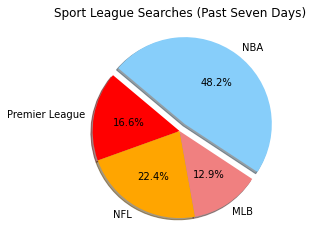

In [19]:
# Week Data
# Create pie chart to show how values are relative to eachother

# Labels for the sections of our pie chart
labels = ["Premier League", "NFL", "MLB", "NBA"]

# The values of each section of the pie chart
sizes = [premier_league_total_week, nfl_total_week, mlb_total_week, nba_total_week]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sport League Searches (Past Seven Days)")

plt.show()

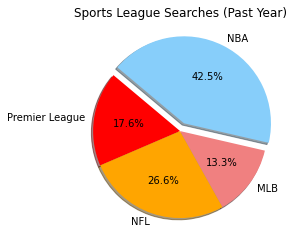

In [20]:
# Year data
# Create pie chart to show how values are relative to eachother

# Labels for the sections of our pie chart
labels = ["Premier League", "NFL", "MLB", "NBA"]

# The values of each section of the pie chart
sizes = [premier_league_total_year, nfl_total_year, mlb_total_year, nba_total_year]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sports League Searches (Past Year)")
plt.show()

In [ ]:
# To Do With Tutor
# Statistical difference for comparing data on Google Trends from year to 7 days and from twitter to Google
# Save results to excel
# Draw conclusions

In [ ]:
# Analysis
# Create hypothesis and null hypothesis
# Question: What is the world's favorite sport?
# Null hypothesis: All the sports are followed similarly
# Hypothesis: The NFL is the most followed sport in the world
# Hypothesis Testing
# Identify appropriate statistical test
# Determin acceptable significance value
# Compute p-value
# Determine if the p-value rejects the null hypothesis by comparing it to the significance value (typically, p < 0.05).

In [ ]:
# Conclusions
# The Google Trend Data from the past year is very similar to the Google Trend Data from the past week
# The sports leagues are ranked the same: #1 NBA, #2 NFL, #3 Premier League and #4 NFL
# The ranks from the Google Trend data from the past week is different from the ranks from the Twitter data from the past week
# The The p value for the twitter data is significant and therefore there are significant differences in the tweet counts per league. The premier league ranks the highest in popularity with the nfl in second, the nba in 3rd and the mlb in fourth
# Based on the twitter data, we can reject the null hypothesis and conclude that the Premier League and NFL are the most discussed sports leagues 
# In comparison to the Google Trends data, the NBA has a significant drop in rank, while the NFL remains in second
# The NFL teams are tweeted about in similar amounts, while there is a larger discrepency with the NBA and the Premier League